<a href="https://colab.research.google.com/github/mburschtin/GA-Python-/blob/master/Appstore_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

#Import Data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving AppleStore.csv to AppleStore.csv


In [0]:
import io
prod = pd.read_csv(io.BytesIO(uploaded['AppleStore.csv']))
# Dataset is now stored in a Pandas Dataframe

# Problem Statement

PROBLEM STATEMENT

## Hypothesis

HYPOTHESIS

## Data Dictionary 
"id" : App ID

"track_name": App Name

"size_bytes": Size (in Bytes)

"currency": Currency Type

"price": Price amount

"rating_count_tot": User Rating counts (for all version)

"rating_count_ver": User Rating counts (for current version)

"user_rating" : Average User Rating value (for all version)

"user_rating_ver": Average User Rating value (for current version)

"ver" : Latest version code

"cont_rating": Content Rating

"prime_genre": Primary Genre

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

"track_name": Application name

"size_bytes": Memory size (in Bytes)

"app_desc": Application description




Source: 

https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/downloads/app-store-apple-data-set-10k-apps.zip/7


## Data Description

The ever-changing mobile landscape is a challenging space to navigate. The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

With million of apps around nowadays, the following data set has become very key to getting top trending apps in iOS app store. This data set contains more than 7000 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website. R and linux web scraping tools were used for this study.

Data collection date (from API); July 2017

Dimension of the data set; 7197 rows and 16 columns


Source: 

https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/downloads/app-store-apple-data-set-10k-apps.zip/7





In [0]:
prod.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
track_name.1         object
size_bytes.1          int64
app_desc             object
dtype: object

#Understanding the Data

In [0]:
# Count of apps / rows in the data
x = prod['id'].nunique()
print("Total number of applications in the data: ", x)
# Quantity of reviews



Total number of applications in the data:  7197


In [0]:
# Ratings
prod['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

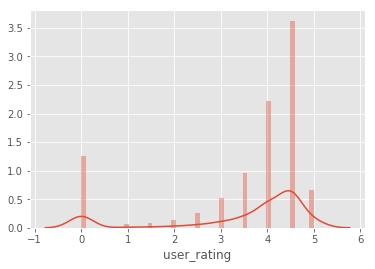

In [0]:
# Ratings distribution
sns.distplot(prod['user_rating'])


In [0]:
# Genres
prod['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [0]:
# Quantity of langages  WHY IS THIS NOT ASCENDING???
prod['lang.num'].value_counts()

1     3767
2      675
11     266
3      217
5      207
12     179
10     168
4      154
8      145
6      143
9      138
7      133
13     130
16     114
14      89
15      86
18      71
31      53
17      46
0       41
21      35
22      32
33      30
19      30
30      28
23      24
26      22
20      21
29      20
32      17
24      16
25      14
34      13
58      12
45       9
28       8
27       7
36       4
46       4
42       3
69       3
41       2
35       2
39       2
55       2
37       2
43       2
54       2
50       1
59       1
47       1
74       1
63       1
40       1
56       1
68       1
75       1
Name: lang.num, dtype: int64

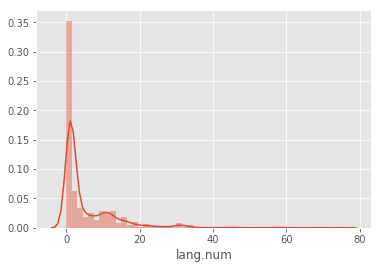

In [0]:
# Language distribution
sns.distplot(prod['lang.num'])

In [0]:
# Quantity of devices
prod['sup_devices.num'].value_counts()

37    3263
38    1912
40    1142
43     371
24     270
25      67
26      42
39      40
47      26
35      24
45       8
16       8
13       7
36       7
11       3
33       2
15       2
9        1
23       1
12       1
Name: sup_devices.num, dtype: int64

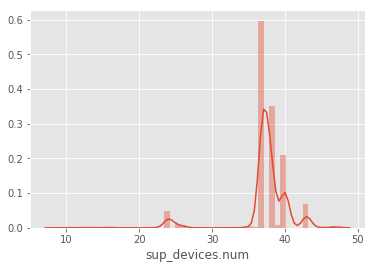

In [0]:
# Devices supported distribution
sns.distplot(prod['sup_devices.num'])

In [0]:
# Prices 
prod['price'].value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

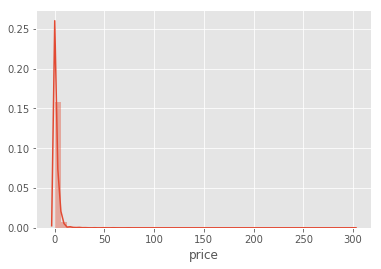

In [0]:
# Price distribution
sns.distplot(prod['price'])

#Genre Analysis

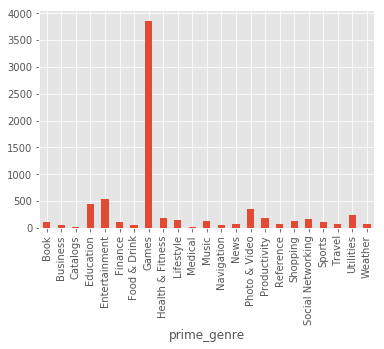

In [0]:
# Overview of Genres
prod.groupby('prime_genre')['id'].nunique().plot(kind='bar')
plt.show()

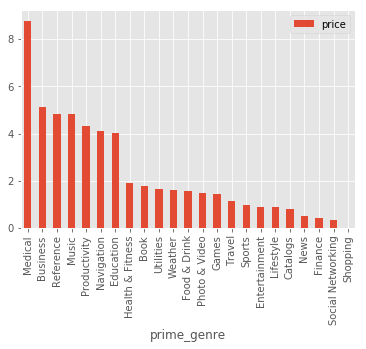

In [0]:
# Average price by prime_genre
prod_subset = prod[['prime_genre', 'price']]
k = prod_subset[['prime_genre', 'price']].groupby('prime_genre').mean().sort_values('price', ascending=False)
k.plot(kind='bar')
plt.show()

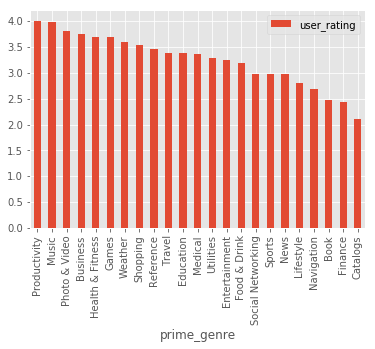

In [0]:
# Average Rating by Genre
prod_subset = prod[['prime_genre', 'user_rating']]
k = prod_subset[['prime_genre', 'user_rating']].groupby('prime_genre').mean().sort_values('user_rating', ascending=False)
k.plot(kind='bar')
plt.show()

# Quantity of Ratings Analysis

In [0]:
prod['rating_count_tot'].head().describe()


count         5.000000
mean     323820.200000
std      380286.014146
min       21292.000000
25%      161065.000000
50%      188583.000000
75%      262241.000000
max      985920.000000
Name: rating_count_tot, dtype: float64

In [0]:

# Number of reviews for each app??
prod.groupby('rating_count_tot')['id'].nunique().describe()


count    3185.000000
mean        2.259655
std        16.901784
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       929.000000
Name: id, dtype: float64

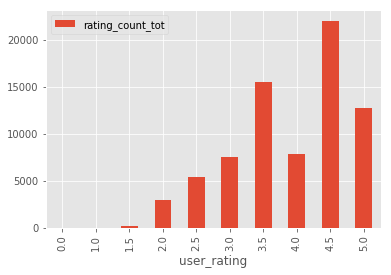

In [0]:
# Ratings by quantity of ratings

prod_subset = prod[['user_rating', 'rating_count_tot']]
k = prod_subset[['user_rating', 'rating_count_tot']].groupby('user_rating').mean()
k.plot(kind='bar')
plt.show()

# Devices and Languages

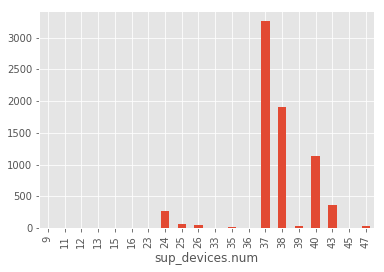

In [0]:
# Overview of quantity of devices
prod.groupby('sup_devices.num')['id'].nunique().plot(kind='bar')
plt.show()

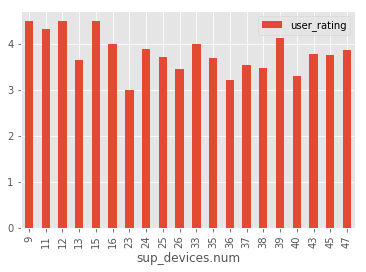

In [0]:
# Quantity of devices vs. ratings
prod_subset = prod[['user_rating', 'sup_devices.num']]
k = prod_subset[['user_rating', 'sup_devices.num']].groupby('sup_devices.num').mean()
k.plot(kind='bar')
plt.show()

In [0]:
prod['lang.num'].head().describe()

count     5.000000
mean     18.000000
std      16.763055
min       3.000000
25%       9.000000
50%      10.000000
75%      23.000000
max      45.000000
Name: lang.num, dtype: float64

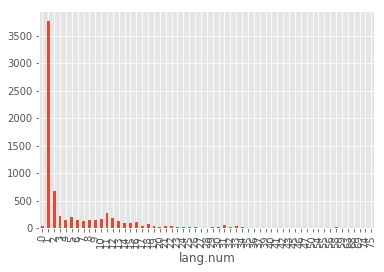

In [0]:
# Overview of quantity of languages
prod.groupby('lang.num')['id'].nunique().plot(kind='bar')
plt.show()

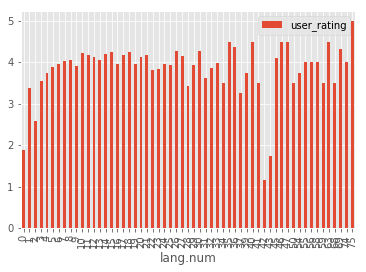

In [0]:
# Quantity of languages vs. ratings

prod_subset = prod[['user_rating', 'lang.num']]
k = prod_subset[['user_rating', 'lang.num']].groupby('lang.num').mean()
k.plot(kind='bar')
plt.show()

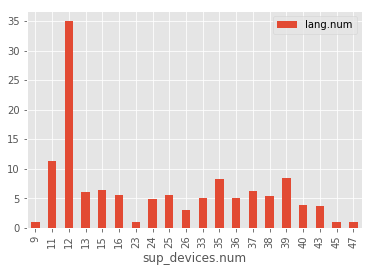

In [0]:
# Quantity of devices vs. languages
prod_subset = prod[['lang.num', 'sup_devices.num']]
k = prod_subset[['lang.num', 'sup_devices.num']].groupby('sup_devices.num').mean()
k.plot(kind='bar')
plt.show()

# Linear Regressions

In [0]:
# Checking for correlation between variables
prod.corr()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes.1
Unnamed: 0,1.000000,0.910714,0.041277,-0.074326,-0.168640,-0.064717,-0.204867,-0.127580,0.024648,0.014589,-0.148487,0.000501,0.041277
id,0.910714,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743,0.077486
size_bytes,0.041277,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418,1.000000
price,-0.074326,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942,0.182392
rating_count_tot,-0.168640,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982,0.004486
rating_count_ver,-0.064717,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460,0.006337
user_rating,-0.204867,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816,0.066256
user_rating_ver,-0.127580,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094,0.086075
sup_devices.num,0.024648,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109,-0.118347
ipadSc_urls.num,0.014589,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901,0.152697


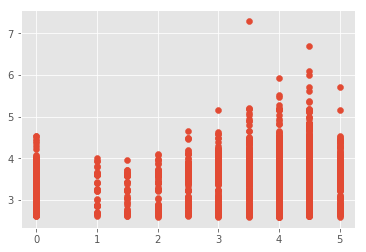

In [0]:
# Predicting user_rating
# x variables: 'rating_count_tot', 'ipadSc_urls.num', 'lang.num', 'sup_devices.num', 'size_bytes.1', 'price'

X = prod[['rating_count_tot', 'ipadSc_urls.num', 'lang.num', 'sup_devices.num', 'size_bytes.1', 'price']]
y = prod['user_rating']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)
plt.scatter(y,predictions)
plt.show()

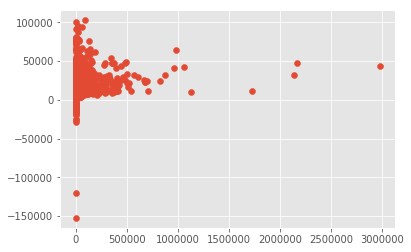

In [0]:
# Predicting rating_count_tot
# x variables: 'user_rating', 'ipadSc_urls.num', 'lang.num', 'sup_devices.num', 'size_bytes.1', 'price'

X = prod[['user_rating', 'ipadSc_urls.num', 'lang.num', 'sup_devices.num', 'size_bytes.1', 'price']]
y = prod['rating_count_tot']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)
plt.scatter(y,predictions)
plt.show()


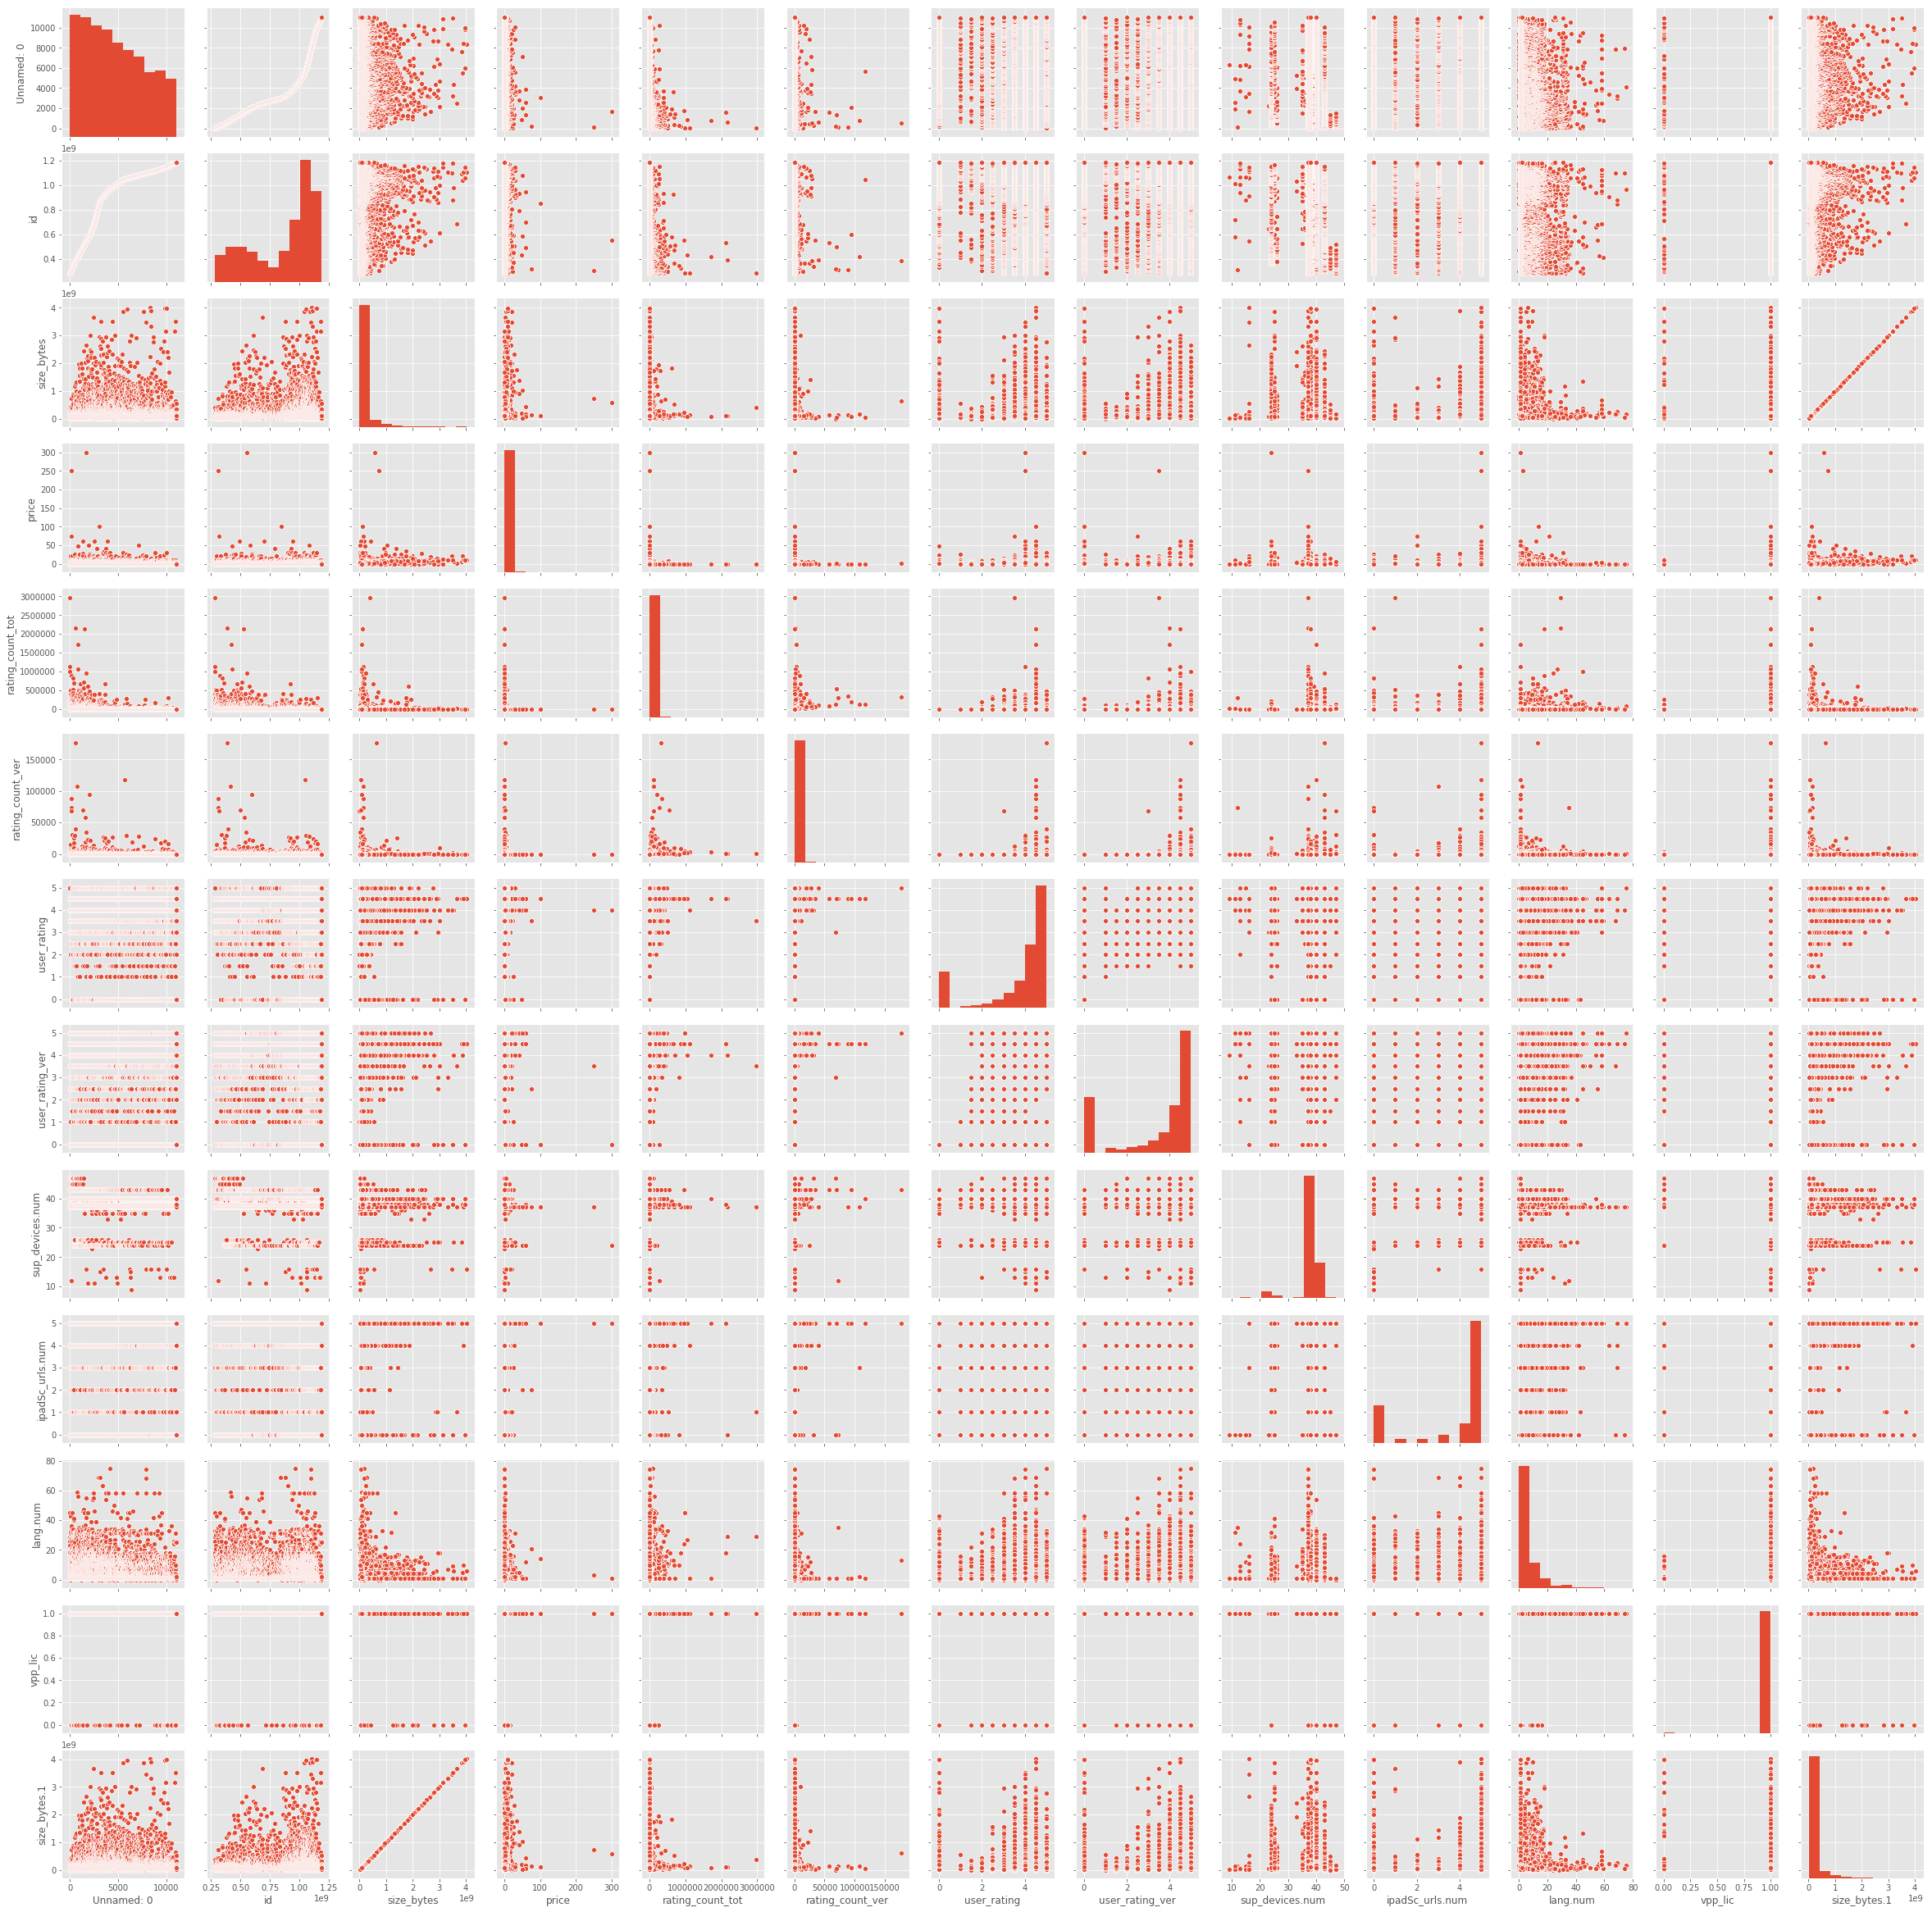

In [0]:
sns.pairplot(prod)
